## Clasificador: Árbol de decisión

Implementado por: Juan Diego González Gómez

### 1. Importación de librerías

In [1]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
# Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns
# Sklearn
from sklearn import tree
# Librería para balancear
from imblearn.over_sampling import SMOTE

### 2. Carga de los datos

In [2]:
# Se cargan los datos.
# Ubicación de los datos, deben estar en la misma carpeta que este notebook
db_location = "202210_Laboratorio1_data_Datos_Clasificacion_2022.csv"

# Se leen los datos, estan separados con ;
data = pd.read_csv(db_location, sep=';', encoding = 'utf-8', na_values = '-', dtype='object')

### 3. Descripción y análisis de los datos

In [3]:
# Dimensiones de los datos
data.shape

(100000, 27)

In [4]:
# Mostrar los datos
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,0,1,1,1,40,1,0,0,0,0,1,0,...,18,15,1,0,9,4,3,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,25,1,0,0,1,0,0,0,...,0,0,0,0,7,6,1,NaN,NaN,NaN,NaN,NaN
2,0,1,1,1,28,0,0,0,0,1,0,0,...,30,30,1,0,9,4,8,NaN,NaN,NaN,NaN,NaN
3,0,1,0,1,27,0,0,0,1,1,1,0,...,0,0,0,0,11,3,6,NaN,NaN,NaN,NaN,NaN
4,0,1,1,1,24,0,0,0,1,1,1,0,...,3,0,0,0,11,5,4,NaN,NaN,NaN,NaN,NaN


In [5]:
# Imprimimos los diferentes tipos de las columnas. Todos son objetos.
data.dtypes

Diabetes_012            object
HighBP                  object
HighChol                object
CholCheck               object
BMI                     object
Smoker                  object
Stroke                  object
HeartDiseaseorAttack    object
PhysActivity            object
Fruits                  object
Veggies                 object
HvyAlcoholConsump       object
AnyHealthcare           object
NoDocbcCost             object
GenHlth                 object
MentHlth                object
PhysHlth                object
DiffWalk                object
Sex                     object
Age                     object
Education               object
Income                  object
Unnamed: 22             object
Unnamed: 23             object
Unnamed: 24             object
Unnamed: 25             object
Unnamed: 26             object
dtype: object

In [6]:
# Y hacer una decripción de los datos
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,99969,99963,99983,99969,99965,99964,99974,99971,99967,99968,99976,99976,...,99971,99961,99976,99981,99970,99960,99991,0,0,0,0,0
unique,5,4,4,4,94,4,4,4,4,4,4,4,...,48,53,4,4,15,8,10,0,0,0,0,0
top,0,0,0,1,27,0,0,0,1,1,1,0,...,0,0,0,0,9,6,8,NaN,NaN,NaN,NaN,NaN
freq,84078,56544,56814,96330,9624,55426,95818,90617,76135,63639,81464,94248,...,68495,62518,83320,56163,13114,43815,36920,NaN,NaN,NaN,NaN,NaN


In [7]:
# Se observa que hay ausencias significativas en algunas columnas
data.isnull().sum()

Diabetes_012                31
HighBP                      37
HighChol                    17
CholCheck                   31
BMI                         35
Smoker                      36
Stroke                      26
HeartDiseaseorAttack        29
PhysActivity                33
Fruits                      32
Veggies                     24
HvyAlcoholConsump           24
AnyHealthcare               26
NoDocbcCost                 35
GenHlth                     30
MentHlth                    29
PhysHlth                    39
DiffWalk                    24
Sex                         19
Age                         30
Education                   40
Income                       9
Unnamed: 22             100000
Unnamed: 23             100000
Unnamed: 24             100000
Unnamed: 25             100000
Unnamed: 26             100000
dtype: int64

### 4. Limpieza y preparación de los datos

In [8]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo
data_t = data
# Los datos se convierten a formato numérico
data_t[data_t.columns] = data_t[data_t.columns].apply(pd.to_numeric, errors='coerce')

In [9]:
# Se deciden eliminar las columnas vacías, no tienen información útil para el modelo
data_t = data_t.dropna(how='all', axis='columns')
# Se eliminan los datos duplicados: 5842 filas
data_t = data_t.drop_duplicates()
# Se eliminan los registros con ausencias: 1067 filas
data_t = data_t.dropna()

In [10]:
data_t.shape

(93091, 22)

In [11]:
data_t.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000
mean,0.316142,0.451268,0.443792,0.961769,28.522575,0.461043,0.043925,0.098742,0.747623,0.622595,0.804675,0.060070,0.947417,0.086883,2.561354,3.337820,4.458261,0.176601,0.437540,8.129250,5.030529,6.000999
std,0.715661,0.497622,0.496833,0.191755,7.848531,0.498483,0.204929,0.298317,0.434379,0.484740,0.396453,0.237618,0.223201,0.281665,1.065027,7.747141,9.145297,0.381333,0.496086,3.070138,0.989499,2.074328
min,0.000000,0.000000,0.000000,0.000000,-35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-37.000000,-43.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,36.000000,42.000000,1.000000,1.000000,13.000000,6.000000,8.000000


En este punto, se observa que algunas columnas tienen valores por fuera del rango indicado en el codebook, por lo que se procede a analizarlas con más detenimiento.

In [12]:
data_t.value_counts(['BMI'])

BMI 
27.0    8802
26.0    7228
24.0    6875
28.0    6028
25.0    6026
        ... 
85.0       1
88.0       1
91.0       1
96.0       1
86.0       1
Length: 92, dtype: int64

In [13]:
data_t.value_counts(['MentHlth'])

MentHlth
 0.0        62115
 2.0         5034
 30.0        4528
 5.0         3622
 1.0         3387
 3.0         3012
 10.0        2462
 15.0        2125
 4.0         1508
 20.0        1334
 7.0         1227
 25.0         494
 14.0         445
 6.0          397
 8.0          234
 12.0         167
 28.0         159
 21.0          92
 16.0          66
 29.0          63
 18.0          54
 22.0          47
 9.0           39
 24.0          36
 26.0          34
 36.0          27
-21.0          26
 27.0          25
-33.0          25
-27.0          25
-29.0          25
 34.0          24
 32.0          23
-25.0          23
-19.0          22
-35.0          21
-31.0          20
 13.0          19
 11.0          17
 23.0          16
-17.0          15
-23.0          15
 17.0          14
-15.0          13
 19.0           9
-37.0           6
dtype: int64

In [14]:
data_t.value_counts(['PhysHlth'])

PhysHlth
 0.0        56165
 30.0        7394
 2.0         5744
 1.0         4285
 3.0         3405
            ...  
-21.0          13
-25.0          13
 42.0          13
 19.0          10
-17.0           2
Length: 51, dtype: int64

Para la columna BMI, la mayoría de datos están dentro del rango válido. Sin embargo, para las columnas MentHlth y PhysHlth la mayoría de datos se encuentra fuera de rango (>1 y <30). Para cada caso, se le da un tratamiento distinto.

In [15]:
# BMI:
# Para las filas cuyo valor de BMI está fuera del rango válido, este se reemplaza con el promedio de todos los datos
data_t['BMI'] = np.where((data_t['BMI'] > 1) & (data_t['BMI'] < 99), data_t['BMI'], data_t['BMI'].mean()).tolist()

In [16]:
# MentHlth:
# Dado que una gran parte de los datos se encuentra fuera del rango válido, pero cerca a sus extremos,
# la mayoría de estos datos se reemplazan con el valor más cercano que esté dentro del rango de la siguiente manera:
# Los valores 0.0 y 1.0 se reemplazan con 2.0, y el valor 30.0 se reemplaza con 29.0
data_t['MentHlth'] = data_t['MentHlth'].replace(0, 2)
data_t['MentHlth'] = data_t['MentHlth'].replace(1, 2)
data_t['MentHlth'] = data_t['MentHlth'].replace(30, 29)

# Para las filas cuyo valor de MentHlth es menor a 0 o mayor a 30, estos se reemplazan con el promedio de todos los datos
data_t['MentHlth'] = np.where((data_t['MentHlth'] > 1) & (data_t['MentHlth'] < 30), data_t['MentHlth'], data_t['MentHlth'].mean()).tolist()

In [17]:
# PhysHlth:
# Dado que una gran parte de los datos se encuentra fuera del rango válido, pero cerca a sus extremos,
# la mayoría de estos datos se reemplazan con el valor más cercano que esté dentro del rango de la siguiente manera:
# Los valores 0.0 y 1.0 se reemplazan con 2.0, y el valor 30.0 se reemplaza con 29.0
data_t['PhysHlth'] = data_t['PhysHlth'].replace(0, 2)
data_t['PhysHlth'] = data_t['PhysHlth'].replace(1, 2)
data_t['PhysHlth'] = data_t['PhysHlth'].replace(30, 29)

# Para las filas cuyo valor de PhysHlth es menor a 0 o mayor a 30, estos se reemplazan con el promedio de todos los datos
data_t['PhysHlth'] = np.where((data_t['PhysHlth'] > 1) & (data_t['PhysHlth'] < 30), data_t['PhysHlth'], data_t['PhysHlth'].mean()).tolist()

In [18]:
data_t.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000,93091.000000
mean,0.316142,0.451268,0.443792,0.961769,28.668424,0.461043,0.043925,0.098742,0.747623,0.622595,0.804675,0.060070,0.947417,0.086883,2.561354,4.714383,5.693918,0.176601,0.437540,8.129250,5.030529,6.000999
std,0.715661,0.497622,0.496833,0.191755,7.332472,0.498483,0.204929,0.298317,0.434379,0.484740,0.396453,0.237618,0.223201,0.281665,1.065027,6.795306,8.043471,0.381333,0.496086,3.070138,0.989499,2.074328
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,29.000000,29.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [19]:
data_t.value_counts(['BMI'])

BMI 
27.0    8802
26.0    7228
24.0    6875
28.0    6028
25.0    6026
        ... 
85.0       1
86.0       1
88.0       1
91.0       1
96.0       1
Length: 82, dtype: int64

In [20]:
data_t.value_counts(['MentHlth'])

MentHlth 
2.000000     70536
29.000000     4591
5.000000      3622
3.000000      3012
10.000000     2462
15.000000     2125
4.000000      1508
20.000000     1334
7.000000      1227
25.000000      494
14.000000      445
6.000000       397
4.660064       310
8.000000       234
12.000000      167
28.000000      159
21.000000       92
16.000000       66
18.000000       54
22.000000       47
9.000000        39
24.000000       36
26.000000       34
27.000000       25
13.000000       19
11.000000       17
23.000000       16
17.000000       14
19.000000        9
dtype: int64

In [21]:
data_t.value_counts(['PhysHlth'])

PhysHlth 
2.000000     66194
29.000000     7487
3.000000      3405
5.000000      3039
10.000000     2236
15.000000     1885
4.000000      1781
7.000000      1756
20.000000     1307
14.000000      993
25.000000      570
6.000000       558
5.631533       365
8.000000       338
12.000000      241
21.000000      227
28.000000      208
18.000000       79
9.000000        73
26.000000       52
16.000000       52
22.000000       48
24.000000       40
17.000000       34
27.000000       32
13.000000       30
23.000000       28
11.000000       23
19.000000       10
dtype: int64

### 5. Construcción del modelo: Árbol de decisión

In [22]:
# Se selecciona la variable objetivo, en este caso "Diabetes_012"
Y = data_t['Diabetes_012']
# Del conjunto de datos se elimina la variable "Diabetes_012"
X = data_t.drop(['Diabetes_012'], axis=1)

In [23]:
# Se dividen los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
# Se balancean las clases
sm = SMOTE(random_state=42)
X_bal, Y_bal = sm.fit_resample(X_train, Y_train)

In [25]:
# Se fija el número de particiones: K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [26]:
# Se establece el espacio de búsqueda de hiperparámetros
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,5,6],'min_samples_split':[2,3]}

In [27]:
# Se define el modelo
arbol = DecisionTreeClassifier(random_state=0)

In [28]:
# Se utiliza GridSearch sobre el grid definido en la validación cruzada
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Se entrena el modelo
mejor_modelo.fit(X_bal, Y_bal)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6], 'min_samples_split': [2, 3]})

In [29]:
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2}

In [30]:
arbol_final = mejor_modelo.best_estimator_
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.78
Exactitud sobre test: 0.78


C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


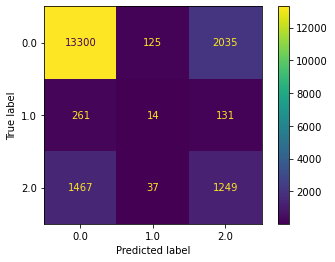

In [31]:
plot_confusion_matrix(arbol_final, X_test, Y_test)  
plt.show()

In [32]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87     15460
         1.0       0.08      0.03      0.05       406
         2.0       0.37      0.45      0.40      2753

    accuracy                           0.78     18619
   macro avg       0.44      0.45      0.44     18619
weighted avg       0.79      0.78      0.79     18619



In [33]:
importancia = arbol_final.feature_importances_
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,HighBP,0.438256
1,HighChol,0.264081
2,GenHlth,0.163788
3,Sex,0.027183
4,Age,0.023794
5,PhysActivity,0.020421
6,BMI,0.014940
7,NoDocbcCost,0.013095
8,Education,0.012137
9,PhysHlth,0.007227


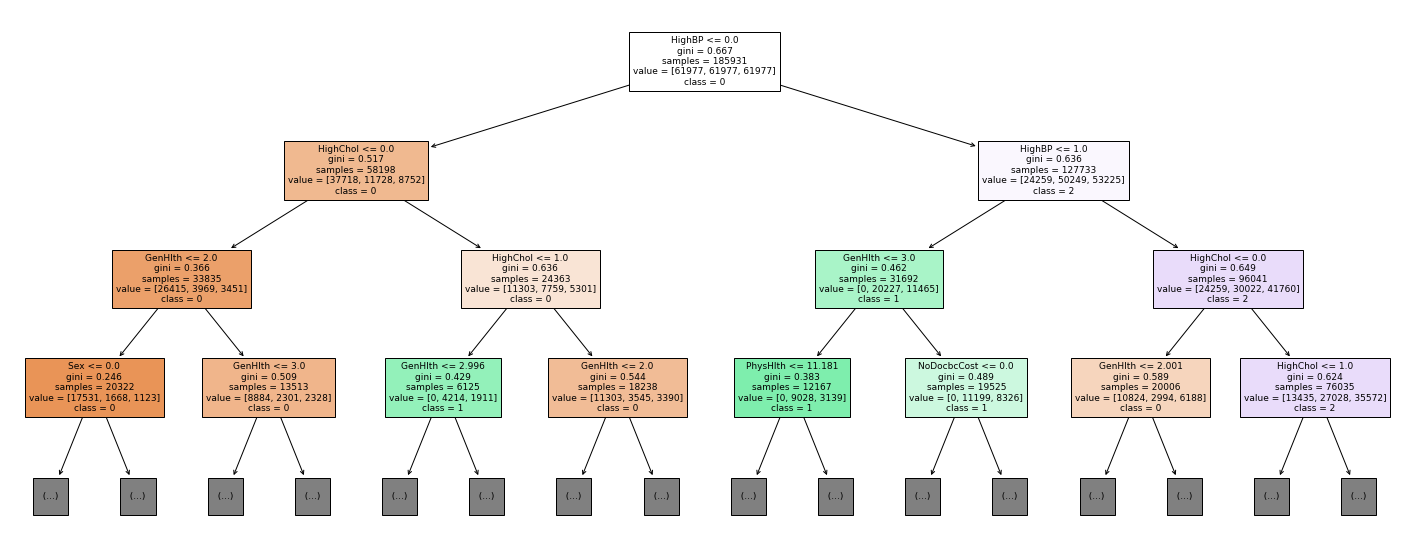

In [34]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol_final, max_depth=3, feature_names=X.columns, class_names=["0", "1", "2"], filled=True, fontsize=9)